# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [2]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [3]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [4]:
# Your code here:
display(customers.head())
display(customers.describe())
display(customers.skew())
customers.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [5]:
# Your observations here
"""
The dataset contains all numerical data, without nulls values. There are no extreme correlations besides between Grocery
and Detergents_Paper. There is relatively high skewness in Delicassen, probably due to extreme high values typical in this category
"""

'\nThe dataset contains all numerical data, without nulls values. There are no extreme correlations besides between Grocery\nand Detergents_Paper. There is relatively high skewness in Delicassen, probably due to extreme high values typical in this category\n'

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [3]:
# Your code here

#customers['Delicassen_log'] = np.log(customers['Delicassen'])

#customers[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']] = \
#np.log(customers[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])

In [ ]:
# Your comment here

"""
I have tried reducing the skewness of numberical features and only the Delicassen feature but the results have wor
"""

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [5]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

scaler = StandardScaler()
customers_scale = scaler.fit_transform(customers)

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [6]:
# Your code here:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42).fit(customers_scale)

customers['labels'] = kmeans.labels_

Count the values in `labels`.

In [7]:
# Your code here:

customers['labels'].value_counts()

0    158
1     90
7     79
4     33
2     30
5     23
8     19
3      5
9      2
6      1
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [8]:
# Your code here

from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.5).fit(customers_scale)

customers['labels_DBSCAN'] = clustering.labels_

Count the values in `labels_DBSCAN`.

In [9]:
# Your code here
customers['labels_DBSCAN'].value_counts()

-1    255
 1    130
 5     22
 4      7
 6      6
 2      5
 7      5
 3      5
 0      5
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

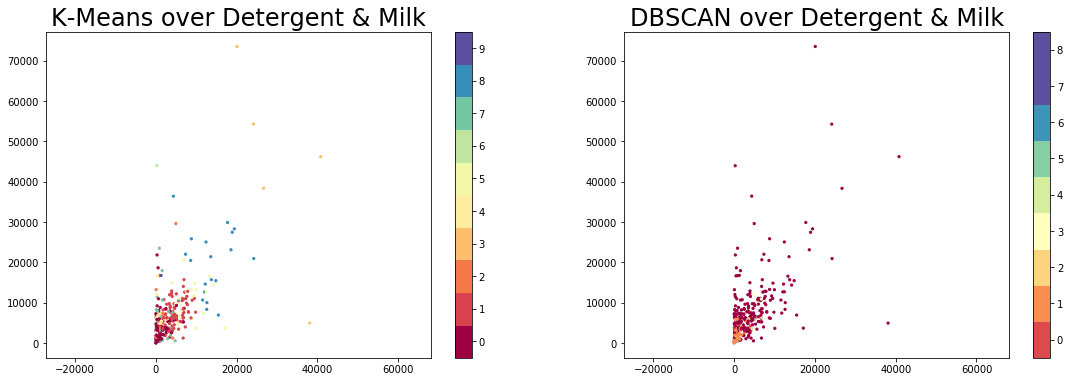

In [27]:
# Your code here:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(19, 6))

plt.subplot(1,2,1)
plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=kmeans.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(kmeans.n_clusters+1)-0.5).set_ticks(np.arange(kmeans.n_clusters))
plt.title('K-Means over Detergent & Milk', fontsize=24);


plt.subplot(1,2,2)
plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=clustering.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(clustering.labels_))+1)-0.5).set_ticks(np.arange(len(np.unique(clustering.labels_))))
plt.title('DBSCAN over Detergent & Milk', fontsize=24);

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

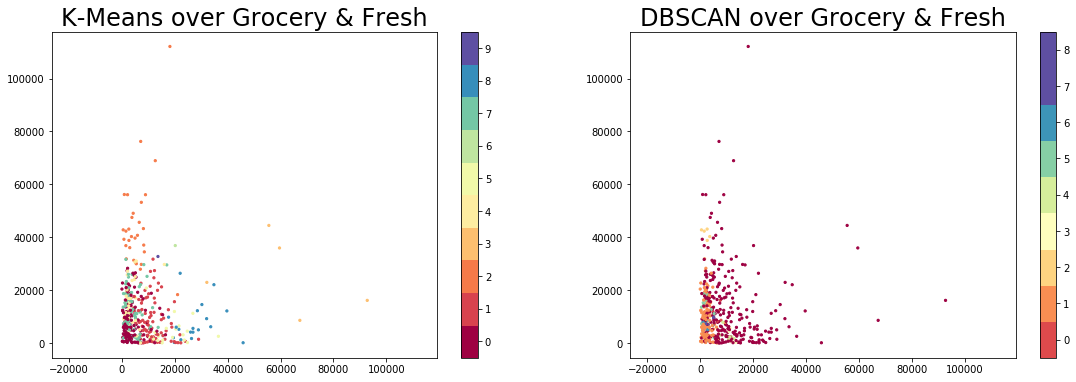

In [26]:
# Your code here:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(19, 6))

plt.subplot(1,2,1)
plt.scatter(customers['Grocery'], customers['Fresh'], c=kmeans.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(kmeans.n_clusters+1)-0.5).set_ticks(np.arange(kmeans.n_clusters))
plt.title('K-Means over Grocery & Fresh', fontsize=24);


plt.subplot(1,2,2)
plt.scatter(customers['Grocery'], customers['Fresh'], c=clustering.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(clustering.labels_))+1)-0.5).set_ticks(np.arange(len(np.unique(clustering.labels_))))
plt.title('DBSCAN over Grocery & Fresh', fontsize=24);

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

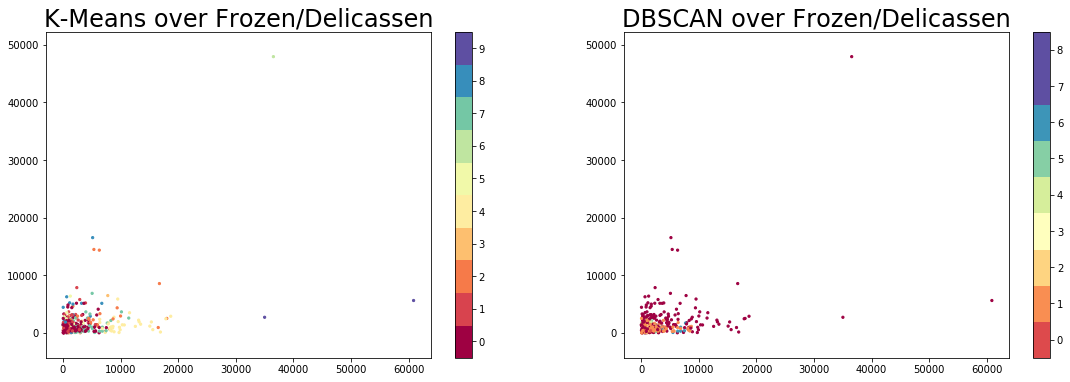

In [25]:
# Your code here:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(19, 6))

plt.subplot(1,2,1)
plt.scatter(customers['Frozen'], customers['Delicassen'], c=kmeans.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(kmeans.n_clusters+1)-0.5).set_ticks(np.arange(kmeans.n_clusters))
plt.title('K-Means over Frozen/Delicassen', fontsize=24);


plt.subplot(1,2,2)
plt.scatter(customers['Frozen'], customers['Delicassen'], c=clustering.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(clustering.labels_))+1)-0.5).set_ticks(np.arange(len(np.unique(clustering.labels_))))
plt.title('DBSCAN over Frozen/Delicassen', fontsize=24);

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [15]:
# Your code here:

customers.groupby(['labels_DBSCAN', 'labels']).mean()


Channel    Region         Fresh          Milk  \
labels_DBSCAN labels                                                   
-1            0       1.000000  3.000000   8151.916667   6479.111111   
              1       2.000000  2.904110   9478.013699   7714.000000   
              2       1.083333  2.750000  45660.208333   5312.666667   
              3       2.000000  2.800000  25603.000000  43460.600000   
              4       1.038462  2.692308  16053.076923   4361.269231   
              5       2.000000  1.391304   4163.000000  10296.782609   
              6       1.000000  3.000000  36847.000000  43950.000000   
              7       1.043478  1.369565  11965.347826   4366.065217   
              8       2.000000  2.736842   7758.000000  19774.315789   
              9       1.000000  2.500000  22015.500000   9937.000000   
 0            1       2.000000  3.000000  11401.000000   3536.200000   
 1            0       1.000000  3.000000   8625.393443   1865.860656   
              2       1.000000  3.000000  31812.000000   1433.000000   
              4       1.000000  3.000000  14662.428571   1864.142857   
 2            2       1.000000  3.000000  41446.600000   1421.200000   
 3            1       2.000000  3.000000   2357.200000  10224.800000   
 4            1       2.000000  3.000000   3068.142857   6095.857143   
 5            7       1.000000  1.000000   9837.863636   1751.863636   
 6            7       1.000000  1.000000   6823.000000   1943.000000   
 7            7       1.000000  2.000000   7494.600000   1537.600000   

                           Grocery        Frozen  Detergents_Paper  \
labels_DBSCAN labels                                                 
-1            0        7083.361111   1859.222222       1804.972222   
              1       12120.219178   1519.958904       4778.931507   
              2        6791.666667   6387.583333       1205.041667   
              3       61472.200000   2636.000000      29974.200000   
              4        4093.807692  11422.192308        515.884615   
              5       17951.173913   1364.956522       8255.869565   
              6       20170.000000  36534.000000        239.000000   
              7        5223.217391   2704.934783       1183.434783   
              8       27522.789474   2007.631579      13633.315789   
              9        7844.000000  47939.000000        671.500000   
 0            1        6729.000000    720.200000       3561.000000   
 1            0        2440.229508   1813.122951        503.229508   
              2        1651.000000    800.000000        113.000000   
              4        2242.857143   7869.285714        435.428571   
 2            2        2167.600000   1276.400000        416.200000   
 3            1       11862.800000    609.600000       5780.000000   
 4            1       10355.000000    994.000000       4675.571429   
 5            7        2161.681818   1513.181818        333.954545   
 6            7        2372.666667   6780.333333        386.500000   
 7            7        3383.000000   2575.400000        227.400000   

                        Delicassen  
labels_DBSCAN labels                
-1            0        1935.166667  
              1        1509.013699  
              2        3347.208333  
              3        2708.800000  
              4        1600.730769  
              5        1421.304348  
              6       47943.000000  
              7        1328.260870  
              8        3429.473684  
              9        4153.500000  
 0            1         258.200000  
 1            0         727.434426  
              2        1440.000000  
              4         895.142857  
 2            2         784.800000  
 3            1         572.800000  
 4            1        1826.428571  
 5            7         669.045455  
 6            7         613.666667  
 7            7         941.000000

Which algorithm appears to perform better?

In [ ]:
# Your observations here

"""
The algorithm that seems to perform better is DBSCAN. In the table above, DBSCAN labels are assigned to 1 subgroup of K-Means labels, besides
on -1 DBSCAN label, where K-Means has several labels. This means DBSCAN is grouping better.
Same can be seen in the charts, were DBSCAN groups together higher value records, and K-Means adds more granuality into that segment but without
much logic apparently.
"""

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here